In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so



## Componentes Principales

### 1. Dada la siguiente tabla de datos correspondientes a la longitud y el ancho de las tortugas pintadas
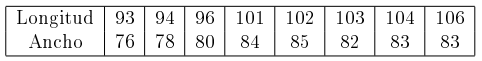

- a) Normalizar las variables para que tengan media 0 y hacer el diagrama de dispersión. Estimar la presencia de correlación entre las variables a partir de este gráfico
- b) Calcular la matriz de covarianzas y hallar sus autovalores y autovectores

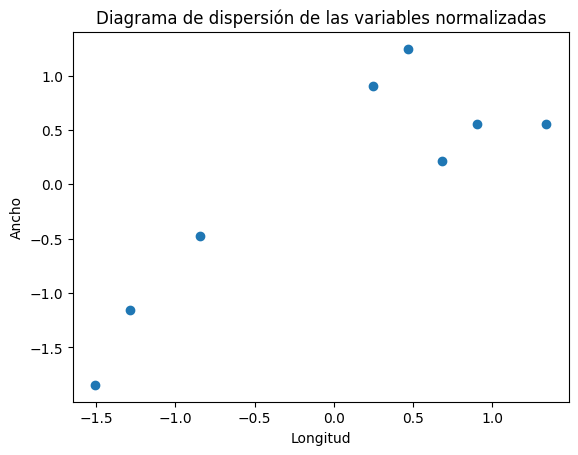

In [10]:
longitud = np.array([93,94,96,101,102,103,104,106])
ancho = np.array([76,78,80,84,85,82,83,83])

# Normalizar las variables para que tengan media 0 y hacer el diagrama de dispersión
longitud = (longitud - np.mean(longitud))/np.std(longitud)
ancho = (ancho - np.mean(ancho))/np.std(ancho)

plt.scatter(longitud, ancho)
plt.xlabel('Longitud')
plt.ylabel('Ancho')
plt.title('Diagrama de dispersión de las variables normalizadas')
plt.show()

In [5]:
np.mean(longitud), np.std(longitud), np.mean(ancho), np.std(ancho)

(5.551115123125783e-17, 1.0, 5.551115123125783e-17, 1.0)

In [15]:
# Calculamos la matriz de covarianzas y hallamos los autovalores y autovectores

cov = np.cov(longitud, ancho)
autovalores, autovectores = np.linalg.eig(cov)

print('Matriz de covarianzas:')
print(cov)
print('\nAutovalores:')
print(autovalores)
print('\nAutovectores:')
print(autovectores)


Matriz de covarianzas:
[[1.14285714 0.98122539]
 [0.98122539 1.14285714]]

Autovalores:
[2.12408253 0.16163176]

Autovectores:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
